In [1]:
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

from collections import defaultdict

In [5]:
def read_files():
    d = defaultdict(list)

    parent_dir = '../Data Sets/'

    path_dic = {'B': 'business_s.csv', 'C':'checkin.csv', 'R':'review.csv'\
               , 'T':'tip.csv', 'U':'user.csv'}

    for key in path_dic:
        d[key] = pd.read_csv(parent_dir + path_dic[key]).drop('Unnamed: 0', 1)
    return d

In [6]:
d = read_files()

/Users/zihaoxu/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


# Looking at the files

In [4]:
d.keys()

dict_keys(['B', 'T', 'R', 'C', 'U'])

In [37]:
d['R'].head(2) # nothing to be dropped

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0.0,VfBHSwC5Vz_pbFluy07i9Q,5.0,My girlfriend and I stayed here for 3 nights a...,0.0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0.0,3zRpneRKDsOPq92tq7ybAA,3.0,If you need an inexpensive place to stay for a...,0.0,bjTcT8Ty4cJZhEOEo01FGA


In [38]:
d['T'].head(2) # nothing to be dropped

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg


In [39]:
d['C'].head(2) # nothing to be dropped

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Thursday': {'4:00': 1, '1:00': 1, '19:00': 1..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Wednesday': {'17:00': 1}, 'Saturday': {'21:0..."


In [41]:
pd.set_option('display.max_columns', 500)
d['U'].head(2)


,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,569,1834,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"['M19NwFwAXKRZzt8koF11hQ', 'QRcMZ8pJJBBZaKubHO...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,74,402,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"['eoSSJzdprj3jxXyi94vDXg', 'QF0urZa-0bxga17ZeY...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18


# getting attributes from the attribute col in d['B']

In [ ]:
print ([x +'===========================' for x in d['B']['attributes'][0:3]])

In [54]:
# looking at attributes:

attributes = ['OutdoorSeating', 'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible', 'GoodForMeal', 'Ambience',\
             'NoiseLevel', 'RestaurantsReservations', 'BusinessAcceptsCreditCards']
for a in attributes:
    print(a + ': ' + str(sum([s.count(a)>0 for s in d['B']['attributes']]) / len(d['B'])))

OutdoorSeating: 0.32118437936912264
RestaurantsPriceRange2: 0.6151405460964383
GoodForKids: 0.37258920192289274
WheelchairAccessible: 0.2810475041337087
GoodForMeal: 0.27421012646914245
Ambience: 0.2738781529504146
NoiseLevel: 0.25953306647769714
RestaurantsReservations: 0.29700776945715945
BusinessAcceptsCreditCards: 0.7708871992288


In [81]:
# extracting prices:
def extract_price(ind):
    try:
        start = d['B']['attributes'][ind].index('RestaurantsPriceRange2')
        return d['B']['attributes'][ind][start+25:start+26]
    except:
        return np.nan
extract_price(5) # test

'2'

In [82]:
# adding price columns
d['B']['price'] = [extract_price(i) for i in range(len(d['B']))]
d['B']['price'][:5]

0      2
1      2
2      2
3    NaN
4      1
Name: price, dtype: object

In [95]:
# extracting credit_card:
def extract_credit_card(ind):
    try:
        start = d['B']['attributes'][ind].index('BusinessAcceptsCreditCards')
        return d['B']['attributes'][ind][start+29:start+33] == 'True'
    except:
        return np.nan
extract_credit_card(0) # test

nan

In [96]:
# adding credit_card columns
d['B']['credit_card'] = [extract_credit_card(i) for i in range(len(d['B']))]
d['B']['credit_card'][:5]

0      NaN
1    False
2     True
3      NaN
4     True
Name: credit_card, dtype: object

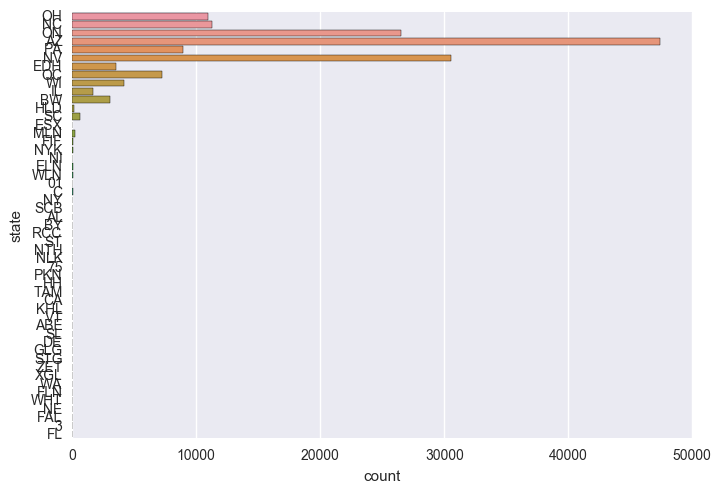

In [42]:
# looking at state dist.
sns.countplot(data = d['B'], y = 'state')
plt.show()

In [104]:
# 0.8657 of all business are in states: ['OH', 'NC', 'ON', 'AZ', 'PA', 'NV']
# therefore throw out all the other states!

len(d['B'][d['B']['state'].isin(['OH', 'NC', 'ON', 'AZ', 'PA', 'NV'])]) / len(d['B'])
d['B'] = d['B'][d['B']['state'].isin(['OH', 'NC', 'ON', 'AZ', 'PA', 'NV'])]
d['B'].to_csv(parent_dir+'business_s.csv')

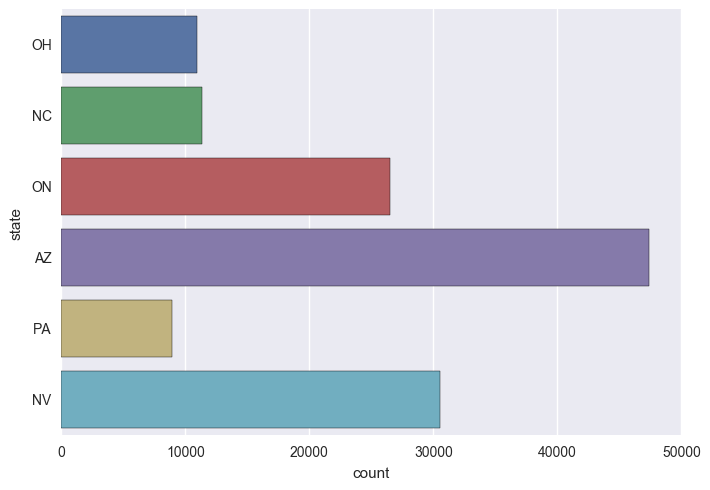

In [99]:
# looking at state dist.
sns.countplot(data = d['B'][d['B']['state'].isin(['OH', 'NC', 'ON', 'AZ', 'PA', 'NV'])], y = 'state')
plt.show()


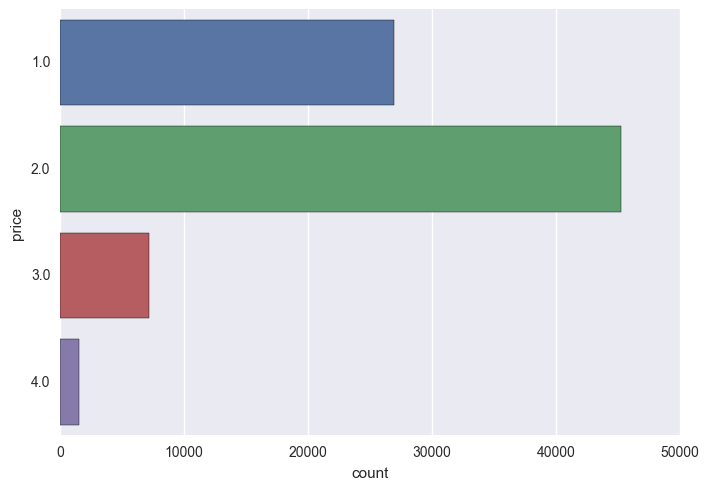

In [7]:
# looking at price dist.
sns.countplot(data = d['B'], y = 'price')
plt.show()


In [105]:
print(list(d['B']))

['address', 'attributes', 'business_id', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'review_count', 'stars', 'state', 'price', 'credit_card']


# Pruning the review file

In [8]:
d['R'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736899 entries, 0 to 4736898
Data columns (total 9 columns):
business_id    object
cool           object
date           object
funny          float64
review_id      object
stars          float64
text           object
useful         float64
user_id        object
dtypes: float64(3), object(6)
memory usage: 325.3+ MB


In [9]:
in_buz = [r in list(d['B']['business_id']) for r in d['R']['business_id']]

KeyboardInterrupt: 

In [115]:
merged = d['R'].merge(d['B'], on = 'business_id', how = 'inner')

In [117]:
len(merged.drop_duplicates(subset = 'name'))

101431